# Data Exploration

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

### Load Dataset

In [2]:
df = pd.read_csv('../data/mock-data.csv')
df.head()

,Post_ID,Raw_Caption,Final Status
0,NYC-MOCK-0001,LOOK | The Philippines co-hosts the National Y...,Accepted
1,NYC-MOCK-0002,READ | NYC leads Digital Literacy for student ...,Accepted
2,NYC-MOCK-0003,#AreaNews | SK Leaders in Quezon City complete...,Accepted
3,NYC-MOCK-0004,READ | NYC leads Mental Health Support for LGB...,Accepted
4,NYC-MOCK-0005,READ | NYC leads Climate Action for LGBTQIA+ y...,Accepted


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Post_ID       1000 non-null   object
 1   Raw_Caption   1000 non-null   object
 2   Final Status  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


The dataset has three columns (Post_ID, Raw_Caption, Final Status) and 1000 rows of social media captions. 

In [4]:
df.columns

Index(['Post_ID', 'Raw_Caption', 'Final Status'], dtype='object')

In [5]:
df.dtypes

Post_ID         object
Raw_Caption     object
Final Status    object
dtype: object

IDs are not numeric, captions and status are not strings.

### Label Distribution

In [6]:
df["Final Status"].value_counts()

Final Status
Accepted        713
For Revision    193
Rejected         94
Name: count, dtype: int64

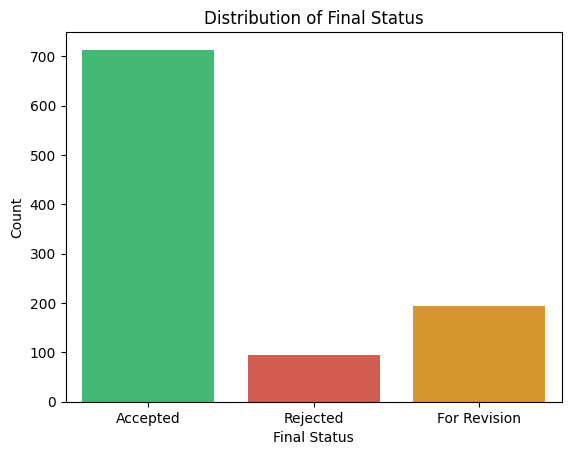

In [7]:
color_map = {"Accepted": "#2ECC71", "For Revision": "#F39C12", "Rejected": "#E74C3C"}
sns.countplot(data=df, x="Final Status", hue = "Final Status", palette=color_map)
plt.title("Distribution of Final Status")
plt.xlabel("Final Status")
plt.ylabel("Count")
plt.show()

Each caption is tagged with one of three labels: Accepted, For Revision, and Rejected. Out of 1000 entries, 713 were accepted, 193 were for revision, and 94 were rejected, indicating a significant class imbalance.

### Missing Values

In [8]:
df.isnull().sum()

Post_ID         0
Raw_Caption     0
Final Status    0
dtype: int64

No missing values in the dataset.

### Duplicates

In [9]:
df.duplicated(subset=["Raw_Caption"]).sum()


np.int64(586)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df[df.duplicated(subset=["Raw_Caption"], keep=False)].sort_values(by="Raw_Caption")

,Post_ID,Raw_Caption,Final Status
884,NYC-MOCK-0885,#AreaNews | SK Leaders in Baguio City complete...,Accepted
606,NYC-MOCK-0607,#AreaNews | SK Leaders in Baguio City complete...,Accepted
998,NYC-MOCK-0999,#AreaNews | SK Leaders in Baguio City complete...,Accepted
660,NYC-MOCK-0661,#AreaNews | SK Leaders in Baguio City complete...,Accepted
300,NYC-MOCK-0301,#AreaNews | SK Leaders in Baguio City complete...,Accepted
...,...,...,...
625,NYC-MOCK-0626,URGENT: Only students from top-tier universiti...,Rejected
722,NYC-MOCK-0723,URGENT: Only students from top-tier universiti...,Rejected
855,NYC-MOCK-0856,URGENT: Only students from top-tier universiti...,Rejected
801,NYC-MOCK-0802,URGENT: Only students from top-tier universiti...,Rejected


586 duplicate entries of captions with similar status tags.

## Summary